# Course: Intro to Python & R for Data Analysis
## Lecture: Becoming a Viz Kid

Basics of Graphs

Professor: Mary Kaltenberg

Fall 2020

contact: mkaltenberg@pace.edu

About me: www.mkaltenberg.com

## Objectives

- Using Figures and Subplots
- Creating Multiple Graphs in one Figure
- Details: Legends, Ticks, Labels
- Saving Figures
- Seaborn: Graphing Made Easy

## Back to Basics

matplotlib works with figure objects.

you can create a figure with:

`plt.figure()`

or by using any plotting function of interest.

figure is basically a container -- it's your blank canvas

You can create multiple figures in one space - which can be quite convenient if you want to show a relationship between variables in different persectives. 

You have to first create an empty figure and then create subplots within that figure. 

typically we name subplots `ax`

The subplot function tells you which graph will be in the space. 

`plt.subplot(nrows,ncolumns,index)`

The first number will indicate the number of rows, the second number the number of columns and the third number is the index so that you can keep track of which box is within the empty container.

Here are the options that can be handy to remember:
<img src ="subplots_options.png" width = 600 >

Proper definition:
ax: A single object of the axes.Axes object if there is only one plot, or an array of axes.Axes objects if there are multiple plots, as specified by the nrows and ncols.

Some advanced treatments of adding subplots of various sizes and shapes can be found [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)

Let's see how it works.

In [1]:
import matplotlib.pyplot as plt
#empty figure here
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

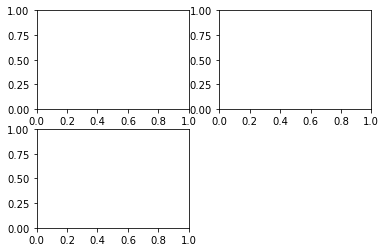

In [2]:
# We will fill this empty figure with subplots

ax1 = plt.subplot(2,2,1) # 2 rows, 2 columns, with index 1
ax2 = plt.subplot(2,2,2) #(typically the name is called ax)
ax3 = plt.subplot(2,2,3)

plt.show()

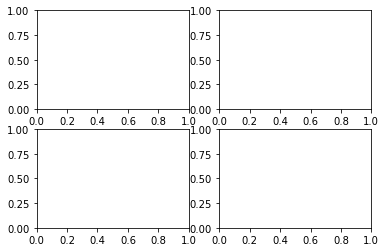

In [3]:
# Often, you see the figure and axes combined in one easy-peasy step
fig, ax = plt.subplots(nrows = 2, ncols = 2)  #creating a space with 2 rows and 3 columns

#We do this so we can save entire figures in one document or make changes in the figure aspect 
# and other changes in the subplots

<BarContainer object of 2 artists>

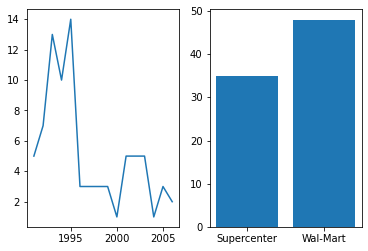

In [7]:
# Let's put stuff in the graphs using data from last class
import pandas as pd

#importing the data
path = '/Users/mkaltenberg/Documents/Data Analysis Python R Lectures/Data_Analysis_Python_R/Lecture 8/'
walmart = pd.read_csv(path+'1962_2006_walmart_store_openings.csv')

#select in state in NY
select_walmart = walmart[(walmart['STRSTATE'] == 'NY')] # filter the data for a set of states

fig, ax = plt.subplots(nrows = 1, ncols = 2)
                       
# #filtering data for first line graph
store_time_state = select_walmart[['YEAR','storenum', 'STRSTATE']].drop_duplicates(
                        ).groupby(['YEAR', 'STRSTATE']).count().reset_index()
#defining the subplot area
ax1 = plt.subplot(1, 2,1)
# assigning index 1 graph to be the line graph
ax1.plot(store_time_state['YEAR'],store_time_state['storenum']) #creating a line plot to be added

#filtering data for bar graph
store_type = select_walmart[['type_store','storenum']].drop_duplicates(
            ).groupby('type_store').count().reset_index()
#defining the subplot area
ax2 = plt.subplot(1, 2,2)
#assigning index 2 graph to be the bar graph
ax2.bar(store_type['type_store'], store_type['storenum'])

# plt.show()

## Figure Size

Sometimes you may want to change the size or dimensions of your figures or subfigures.  This option can be accomplished two ways:

`fig, ax = plt.subplots(figsize=(20, 10))`

`plt.figure(figsize=(20,10))`

Where the first number is width and the second number is height (in inches)

## Legends

Adding a legend to your plot is done with:
    
`plt.legend()`


There are lots of options out there to help you, but when it comes to placement, the best options to use are:

`location` This is where you place the legend in your figure. The options can be noted with the code or with the string name:

        ===============   =============
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10
        ===============   =============


`bbox_to_anchor` This is a coordinate system and based on where you placed the legend (aka the location) you can move the legend left, right, up, down, etc as you would with any coordinate syste, 

`ncol` allows you to set the number of columns in a legend (useful if you have a lot of items in your legend, or you want to place the legend underneath your graph and make it "flat")

`fontsize` allows you to adjust the size of the font in the legend

`title` allows you to creat a title for your legend

`title_fontsize` allows you to control the font size of the title of your legend

There are really a TON of options out there and it will be specific to what you're trying to accomplish, but those options are the most used.

### Tick Tricks and label

When you are working with multiple graphs, you have to decide on whether you want to change aspects of the subplot of the figure.

When you want to change aspects about the entire container, you call information about the figure.  If you want to change aspects about the subplot area, you typically use ax.set_item (item being the thing you want to mess with). 

For specific axis specification, some commonly options are:

`ax.set_xlabel()` Set the x label name (or y axis)

`ax.set_xticks()` Set the x ticks (or y)

`ax.set_title()` Set the title of the graph for that specific graph

For figure options, common options are:

`fig.suptitle()` Set the title of the entire figure

`fig.legend()` Set the legend for the entire figure

Let's use the above example to fiddle with the title and x-axis titles

Pro-tip: An advanced treatment of legends with figure is to use the get legen handels and create your own labels when you want to create a legend for the entire figure with multiple subplots. 

``` python
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
```

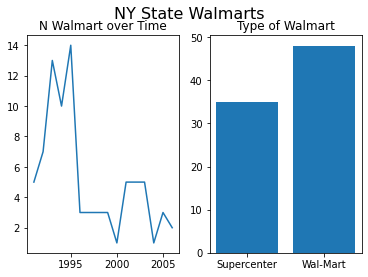

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

#filtering data for first line graph
store_time_state = select_walmart[['YEAR','storenum', 'STRSTATE']].drop_duplicates().groupby(['YEAR', 'STRSTATE']).count().reset_index()
#defining the subplot area
ax1 = plt.subplot(1, 2,1)
# assigning index 1 graph to be the line graph
ax1.plot(store_time_state['YEAR'],store_time_state['storenum']) #creating a line plot to be added

#filtering data for bar graph
store_type = select_walmart[['type_store','storenum']].drop_duplicates().groupby('type_store').count().reset_index()
#defining the subplot area
ax2 = plt.subplot(1, 2,2)
#assigning index 2 graph to be the bar graph
ax2.bar(store_type['type_store'], store_type['storenum'])

fig.suptitle('NY State Walmarts', fontsize=16)  #<- here, I added the title for the figure
ax1.set_title('N Walmart over Time') #<- Title for subfigure 1
ax2.set_title('Type of Walmart') #<- Title for subfigure 2
plt.show()

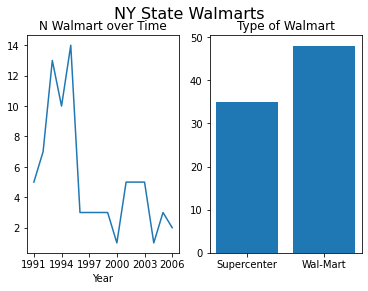

In [13]:
# Maybe you want to change x ticks in axis 1

fig, ax = plt.subplots(nrows = 1, ncols = 2)

#filtering data for first line graph
store_time_state = select_walmart[['YEAR','storenum', 'STRSTATE']].drop_duplicates().groupby(['YEAR', 'STRSTATE']).count().reset_index()

#defining the subplot area
ax1 = plt.subplot(1, 2,1)
# assigning index 1 graph to be the line graph
ax1.plot(store_time_state['YEAR'],store_time_state['storenum']) #creating a line plot to be added
ax1.set_xticks([i for i in range(1991,2007,3)])
#<- here I change the specific tick numbers for subplot 1
ax1.set_xlabel('Year')  #<- setting the specific title name for this graph

#filtering data for bar graph
store_type = select_walmart[['type_store','storenum']].drop_duplicates().groupby('type_store').count().reset_index()
#defining the subplot area
ax2 = plt.subplot(1, 2,2)
#assigning index 2 graph to be the bar graph
ax2.bar(store_type['type_store'], store_type['storenum'])

fig.suptitle('NY State Walmarts', fontsize=16)  #<- here, I added the title for the figure
ax1.set_title('N Walmart over Time') #<- Title for subfigure 1
ax2.set_title('Type of Walmart') #<- Title for subfigure 2
plt.show()

## Saving Figures

This part is relatively easy.

Before plt.show() you can save figures with:

`plt.savefig('name_of_fig.png', dpi =xxx, format = 'png')`

You can save in different types and quality. dpi indicates the quality of the figure (I usually use 300 for very high quality graphs). Remember that the higher quality you set, the more memory it takes.

<img src ="savefig_options.png" width = 500 >

Using the option bbox_inches is important if you have legends outside of your figure area. If you don't adjust this, it will cut off portions of your legend.

Another option you can use is `transparent=True` which would make the background transparent.



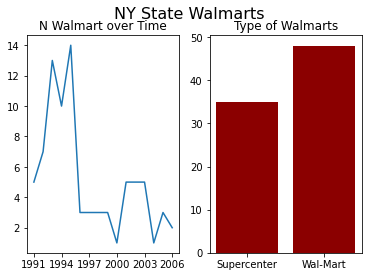

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

#filtering data for first line graph
store_time_state = select_walmart[['YEAR','storenum', 'STRSTATE']].drop_duplicates().groupby(['YEAR', 'STRSTATE']).count().reset_index()
#defining the subplot area
ax1 = plt.subplot(1, 2,1)
# assigning index 1 graph to be the line graph
ax1.plot(store_time_state['YEAR'],store_time_state['storenum']) #creating a line plot to be added
ax1.set_xticks([i for i in range(1991,2007,3)]) #<- here I change the specific tick numbers for subplot 1

#filtering data for bar graph
store_type = select_walmart[['type_store','storenum']].drop_duplicates().groupby('type_store').count().reset_index()
#defining the subplot area
ax2 = plt.subplot(1, 2,2)
#assigning index 2 graph to be the bar graph
ax2.bar(store_type['type_store'], store_type['storenum'], color = 'darkred') #<- dont't forget there are lots of
# options on how to change the color

fig.suptitle('NY State Walmarts', fontsize=16)  #<- here, I added the title for the figure
ax1.set_title('N Walmart over Time') #<- Title for subfigure 1
ax2.set_title('Type of Walmarts') #<- Title for subfigure 2
plt.savefig(path+'nystatewalmarts.png', dpi = 300)
plt.show()

### Let's work with Seaborn

From their website:
Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. 

In other words:
It makes pretty graphs intuitive and easy.

[This](https://www.mit.edu/~amidi/teaching/data-science-tools/study-guide/data-visualization-with-python/) website is a great and easy way to understand all the options which I am reproducing here:

<img src ='basicsns_graphs.png' width = 600>

And the basic labeling instruction that you used earlier work in this environment, as well.

<img src ='legend.png' width =500>


Seaborn makes it easy for you to set environments so that you don't have to keep specifying certain colors or styles that you will reuse throughout your graphs. Consistency is KEY to presentation

Once you set it, it will be active for the entire notebook, not just the cell.

Some useful things to set are:

`sns.set(font_scale=1)`
This allows you to set the font size across the entire figure

`sns.set_style("style")`
This provides a particular style for the graph: darkgrid, whitegrid, dark, white, ticks

`sns.set_palette("palette")`
This provides a palette of colors that your graph will use (useful for categorical data)


## Colors
The named pallettes that they have are NUMEROUS. There are just TONS of options, [this website](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f) provides some great options.

[This website](https://python-graph-gallery.com/196-select-one-color-with-matplotlib/) and [this website](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/) has great named colors that work in seaborn and matplotlib. Go paint the world in color!

You can also use any HEX color, neat search finder of hex codes can be found [here](https://www.color-hex.com/)

In [ ]:
# Seaborn updated their package this September. So, let's update it right now so we can use their new fancy graphs
!pip install seaborn --upgrade

### Bar Charts

Last class I showed you how to do a bar chart. You probably recall that it was super complicated and we had to do a lot of tricks to get the bars in the right locations and all sorts of long complicated mess to do a simplate categorical bar chart.

Well, say goodbye to that mess. Welcome to Seaborn.

In [16]:
import seaborn as sns 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


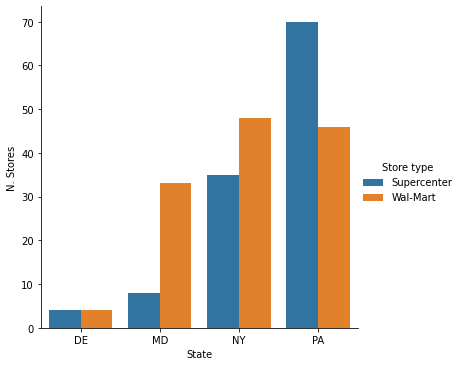

In [21]:
select_walmart = walmart[(walmart['STRSTATE'] == 'NY') | (walmart['STRSTATE'] == 'PA')|
                     (walmart['STRSTATE'] == 'MD') |(walmart['STRSTATE'] == 'DE')]
select_walmart = select_walmart[['type_store','storenum', 'STRSTATE']].drop_duplicates().groupby(['type_store', 'STRSTATE']).count().reset_index()

select_walmart= select_walmart.rename(columns={'STRSTATE': 'State', 'storenum': 'N. Stores', 'type_store': 'Store type'})

sns.catplot('State','N. Stores',data= select_walmart, hue='Store type', kind='bar')
# catplot is specific for categorical data - which make it easier to present information for this type of data

## Line graphs

Using "hue" makes differentiating values much easier than in matplotlib graphs

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


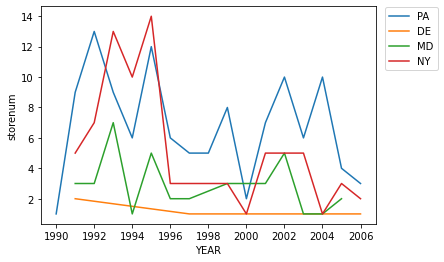

In [34]:
select_walmart = walmart[(walmart['STRSTATE'] == 'NY') | (walmart['STRSTATE'] == 'PA')|
                     (walmart['STRSTATE'] == 'MD') |(walmart['STRSTATE'] == 'DE')]
store_time_state = select_walmart[['YEAR','storenum', 'STRSTATE']].drop_duplicates().groupby(['YEAR', 'STRSTATE']).count().reset_index()

sns.lineplot('YEAR','storenum', data=store_time_state, hue='STRSTATE')
plt.legend(bbox_to_anchor=(1.2, 1.02), loc='upper right')


## Scatter Plots

In [35]:
jobs = pd.read_csv(path+'job-automation-probability.csv')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


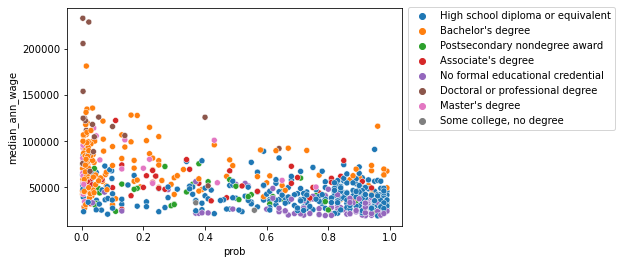

In [47]:
sns.scatterplot('prob', 'median_ann_wage',data=jobs,hue='education')
plt.legend(bbox_to_anchor=(1.65, 1.03), loc='upper right')

## Joint Plot 

This is fantastic to understand basic regression analysis - it includes histograms and the regression line

For exploratory analysis, it packs a ton of information in one place

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


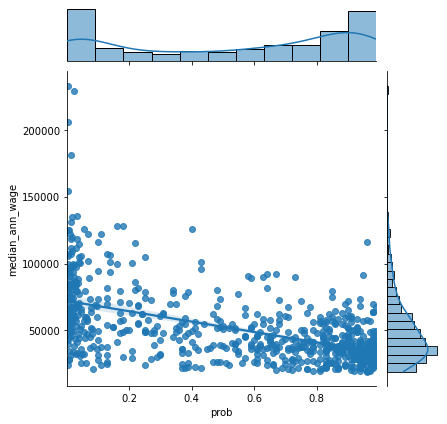

In [51]:
sns.jointplot('prob', 'median_ann_wage',data=jobs, kind='reg')

## Box plots

Box plots were never too difficult in matplotlib, but here is the seaborn version anyways.

In [ ]:
jobs['education'].unique()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[[Text(0, 0, 'HS'), Text(0, 0, 'BA'), Text(0, 0, 'PhD'), Text(0, 0, 'MA')]]

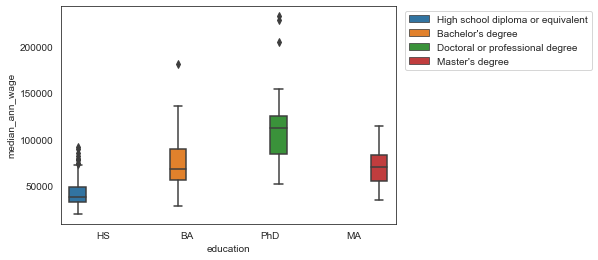

In [65]:
sns.set_style("white")

educ = jobs[(jobs['education']=='High school diploma or equivalent')| (jobs['education']=="Bachelor's degree")
|(jobs['education']=='Doctoral or professional degree') |(jobs['education']=="Master's degree")]

ax = sns.boxplot('education','median_ann_wage',data=educ, hue='education')
plt.legend(bbox_to_anchor=(1.6, 1), loc='upper right')
ax.set(xticklabels=['HS', 'BA', 'PhD','MA'])
# ax.set_xticks([])


## Heat Maps

A heatmap (aka heat map) depicts values for a main variable of interest across two axis variables as a grid of colored squares. The axis variables are divided into ranges like a bar chart or histogram, and each cell’s color indicates the value of the main variable in the corresponding cell range.

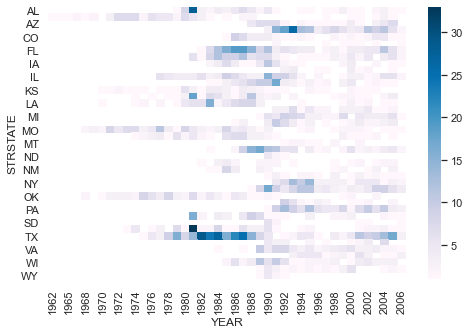

In [68]:
sns.set(font_scale=1)
sns.set_style("white")

plt.figure(figsize=(8,5))

store_time_state = walmart[['YEAR','storenum', 'STRSTATE']].drop_duplicates().groupby(['YEAR', 'STRSTATE']).count().reset_index()

hm = store_time_state.pivot(index= 'STRSTATE',columns = 'YEAR',values = 'storenum')

sns.heatmap(hm, cmap= "PuBu")


In [72]:
#something useful to use is the pandas command describe.
store_time_state['storenum'].describe()

count    726.000000
mean       4.121212
std        4.181954
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       33.000000
Name: storenum, dtype: float64

## Breakout Exercises
import the data "job-automation-probability.csv"
1. A Histogram of the variable 'probability'
2. A scatter plot of 'Average annual wage' and 'numbEmployed'
3. Put both of these graphs in one figure
4. Using item 3, change the ticks of Number Employed axes so that it is in logarithmic axis (it's an option) 
5. Adding onto item 4, add a title and axis labels
6. Save your figure as a png

### For next class
For an easy primer about converting Python to R, check [this website!](https://www.mit.edu/~amidi/teaching/data-science-tools/conversion-guide/r-python-data-manipulation/) 